## Transfer Learning: Inception

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/kidneyData.csv", index_col=0)

In [3]:
df.head()

,image_id,path,diag,target,Class
0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


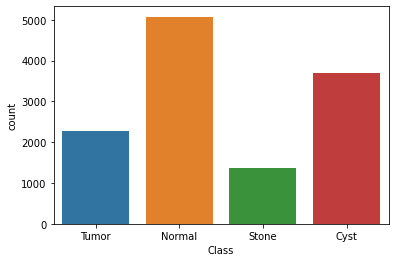

In [4]:
sns.countplot(x='Class', data=df);

In [5]:
import os
import tensorflow as tf

In [6]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [7]:
train_dataset = tf.keras.utils.image_dataset_from_directory("../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/",
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 12446 files belonging to 4 classes.


In [8]:
class_names = train_dataset.class_names
class_names

['Cyst', 'Normal', 'Stone', 'Tumor']

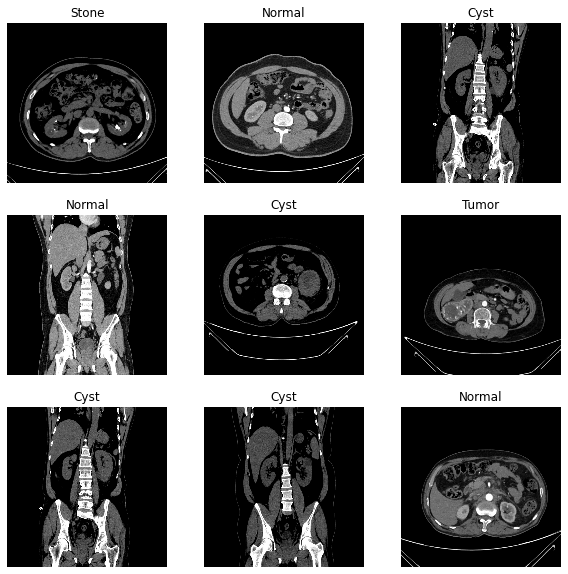

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 1, 0, 1, 0, 3, 0, 0, 1, 2, 1, 0, 3, 0, 2, 3, 0, 2, 3, 0, 1, 1,
       1, 1, 1, 0, 3, 0, 3, 1, 2, 2])>

In [11]:
images[i].shape

TensorShape([160, 160, 3])

In [12]:
base_model = tf.keras.applications.InceptionV3(input_shape=(160, 160, 3), include_top=False)

In [13]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 3, 3, 2048)


In [14]:
base_model.trainable = False

In [15]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 79, 79, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 79, 79, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 17, 17, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 17, 17, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 17, 17, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 17, 17, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 17, 17, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 17, 17, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 17, 17, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 17, 17, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 8, 8, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 8, 8, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 8, 8, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 8, 8, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 8, 8, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 8, 8, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 8, 8, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 8, 8, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 8, 8, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 8, 8, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 8, 8, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 8, 8, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 8, 8, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 8, 8, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 8, 8, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 8, 8, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 8, 8, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [17]:
prediction_layer = tf.keras.layers.Dense(4, activation = 'softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 4)


In [18]:
inputs = tf.keras.Input(shape=(160, 160, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_____________________________________________

In [20]:
len(model.trainable_variables)

2

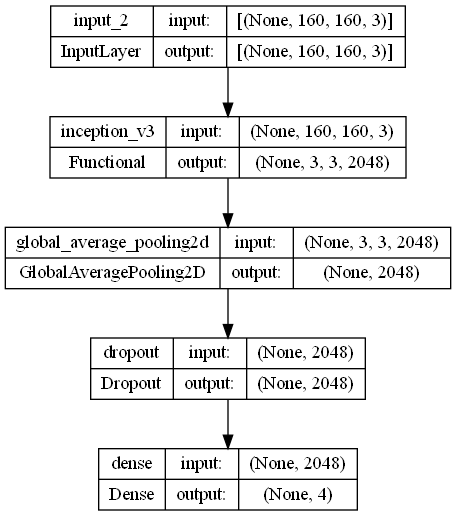

In [21]:
tf.keras.utils.plot_model(model, to_file='InceptionV3.png', show_shapes=True)

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [23]:
val_dataset = train_dataset.take(2000)

In [24]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)

Epoch 1/10
389/389 [==============================] - 58s 140ms/step - loss: 7.6371 - accuracy: 0.4875 - val_loss: 2.5279 - val_accuracy: 0.6913
Epoch 2/10
389/389 [==============================] - 52s 133ms/step - loss: 4.4399 - accuracy: 0.6010 - val_loss: 1.7996 - val_accuracy: 0.7432
Epoch 3/10
389/389 [==============================] - 53s 136ms/step - loss: 3.4905 - accuracy: 0.6396 - val_loss: 1.3746 - val_accuracy: 0.7753
Epoch 4/10
389/389 [==============================] - 51s 132ms/step - loss: 2.8547 - accuracy: 0.6737 - val_loss: 1.1687 - val_accuracy: 0.7929
Epoch 5/10
389/389 [==============================] - 52s 132ms/step - loss: 2.3982 - accuracy: 0.6992 - val_loss: 1.0647 - val_accuracy: 0.8116
Epoch 6/10
389/389 [==============================] - 51s 131ms/step - loss: 1.9925 - accuracy: 0.7278 - val_loss: 0.8541 - val_accuracy: 0.8277
Epoch 7/10
389/389 [==============================] - 51s 131ms/step - loss: 1.8113 - accuracy: 0.7343 - val_loss: 0.6815 - val_ac

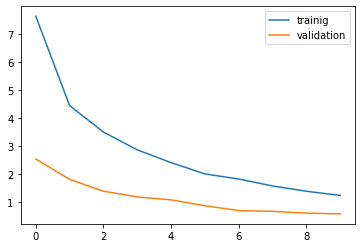

In [27]:
plt.plot(history.history['loss'], label="trainig")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()

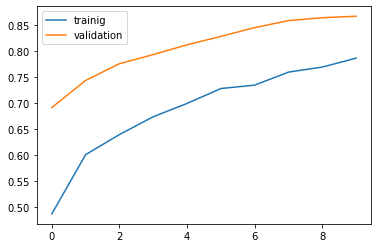

In [28]:
plt.plot(history.history['accuracy'], label="trainig")
plt.plot(history.history['val_accuracy'], label="validation")
plt.legend()

In [29]:
def input_img(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image

def normalize_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

In [64]:
tumor_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (1001).jpg')
cyst_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
stone_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1002).jpg')
normal_img = input_img('../data/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (1002).jpg')

In [65]:
tumor_img = tf.image.resize(tumor_img, size=IMG_SIZE)
cyst_img = tf.image.resize(cyst_img, size=IMG_SIZE)
stone_img = tf.image.resize(stone_img, size=IMG_SIZE)
normal_img = tf.image.resize(normal_img, size=IMG_SIZE)

Tumor

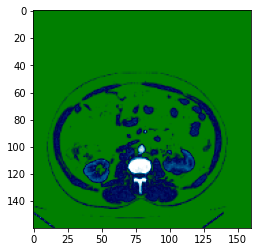

In [80]:
img = tf.reshape(tumor_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [81]:
result = model(tumor_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(tumor_img)
    result = model(tumor_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, tumor_img)

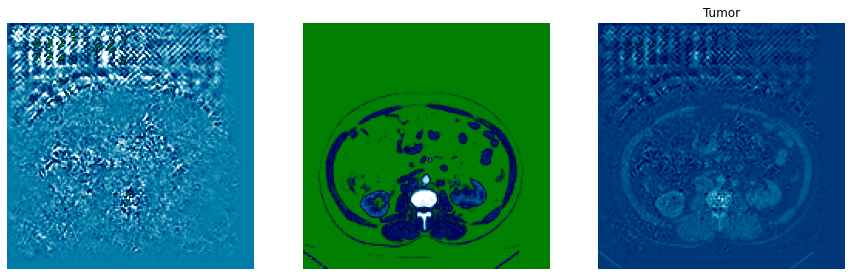

In [82]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Tumor");

Cyst

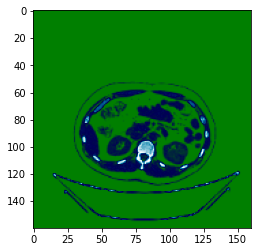

In [83]:
img = tf.reshape(cyst_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [84]:
result = model(cyst_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(cyst_img)
    result = model(cyst_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, cyst_img)

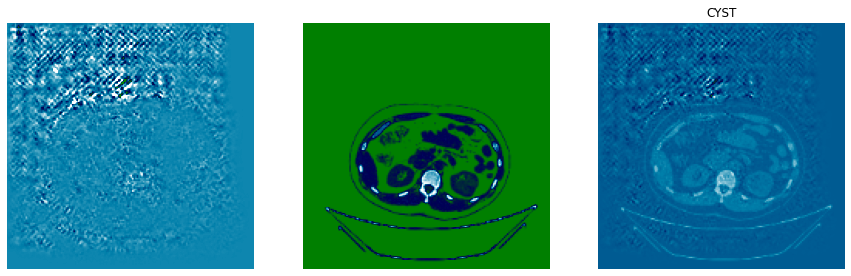

In [85]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("CYST");

Stone

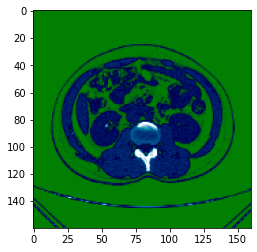

In [86]:
img = tf.reshape(stone_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [87]:
result = model(stone_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(stone_img)
    result = model(stone_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, stone_img)

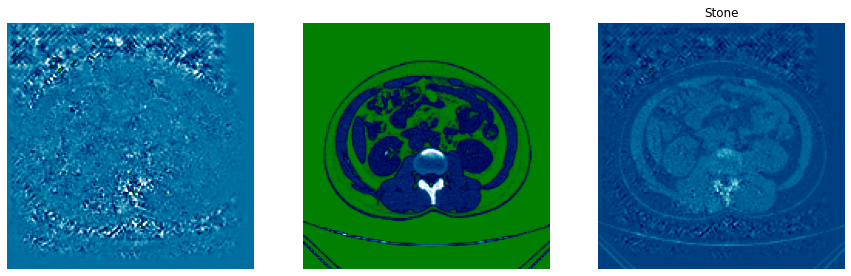

In [88]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");

Normal

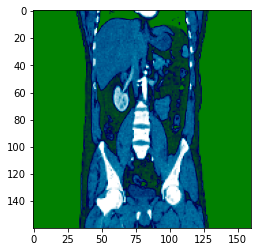

In [89]:
img = tf.reshape(normal_img, shape=(160, 160, 3))
plt.imshow(normalize_image(img), cmap = "ocean")

In [93]:
result = model(normal_img)
max_idx = tf.argmax(result, axis=1)

with tf.GradientTape() as tape:
    tape.watch(normal_img)
    result = model(normal_img)
    max_score = result[0,max_idx[0]]
    
grads = tape.gradient(max_score, normal_img)

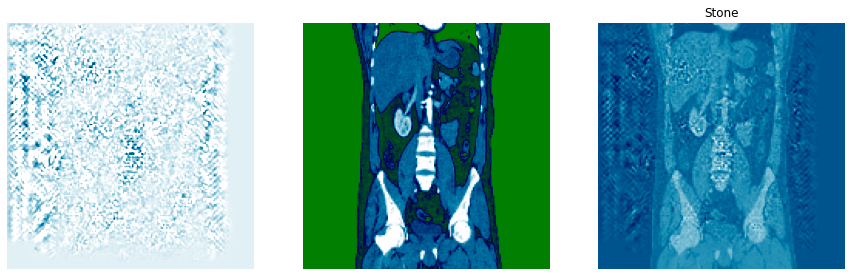

In [95]:
index = 0
plot_maps(normalize_image(grads[index]), normalize_image(img))
plt.title("Stone");